#  1. Import packages

In [39]:
import igraph as ig
from igraph import Graph
import networkx as nx
import matplotlib.pyplot as plt 

# 2. Using igraph
With igraph the node plotting is as follows: <br>
x -> y is represented as (x,y) <br>
A -> G

In [49]:
g_colleagues=ig.Graph(
                edges=[(0,1),(0,2),(1,2),(0,3),(3,1)], # edge relationships
                n=4, # Number of nodes
                directed=True)

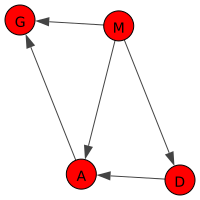

In [50]:
ig.plot(g_colleagues,bbox= (200,200), vertex_size=30,
vertex_label=["M","A","G","D"])

### 3. NetworkX

In [133]:
#create hackathon network
G = nx.Graph()
G.add_nodes_from([1, 4]) # range bassed on numbers 
G.add_edges_from([(1, 2), (1, 3), (2, 3),(4,1)]) # connections of node values

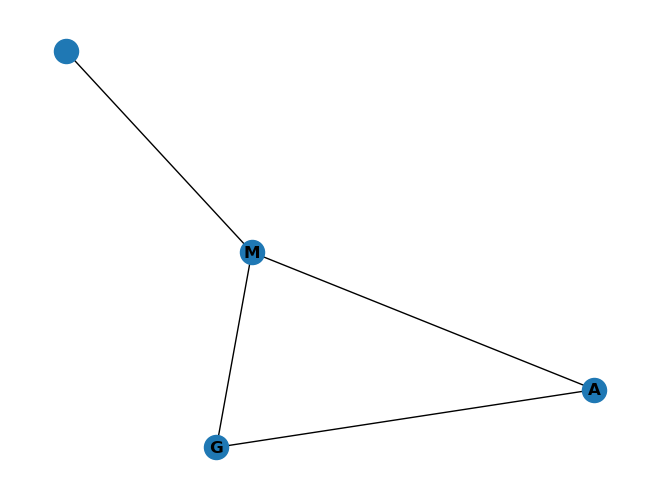

In [134]:
#plot the hackathon network
G.nodes[1]['initial'] = 'M'
G.nodes[2]['initial'] = 'A'
G.nodes[3]['initial'] = 'G'
labels = nx.get_node_attributes(G, 'initial')
nx.draw(G, labels=labels, font_weight='bold')

# 3. Random Graphs


As network science explored real-world systems, researchers developed models like Erdős-Rényi random graphs—where edges form probabilistically between vertex pairs—to understand whether network growth follows random patterns or more structured behaviors.


## **Erdős-Rényi Model** 

The ER model uses a binomial distribution with it's probability: What is the probability that 2 nodes are connected? Yes/No. The higher the probability the more the entire network is connected.


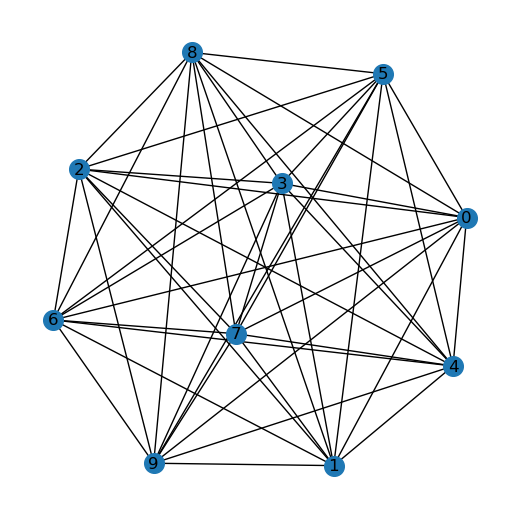

In [73]:
# parameters
num_nodes = 10
prob = 1

# Create graph
random_graph = nx.erdos_renyi_graph(num_nodes,prob)

# visualize
plt.figure(figsize=(5,5))
nx.draw(random_graph,node_size=200,with_labels=True)
plt.show()

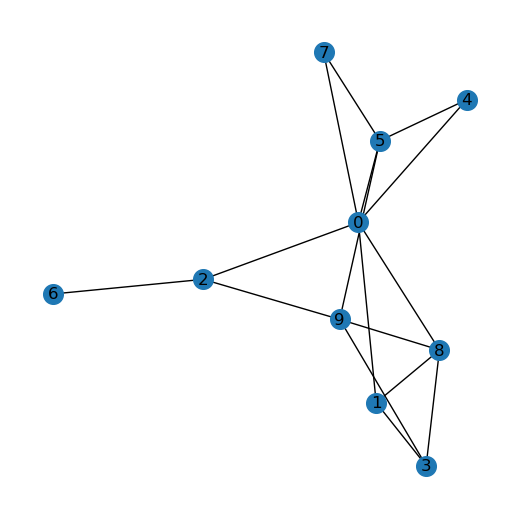

In [74]:
# parameters
num_nodes = 10
prob = 0.5
# Create graph
random_graph = nx.erdos_renyi_graph(num_nodes,prob)

# visualize
plt.figure(figsize=(5,5))
nx.draw(random_graph,node_size=200,with_labels=True)
plt.show()

## Barabási–Albert graph

The BA model mimics real-world networks (like social or citation networks) where "the rich get richer"—nodes with higher degrees are more likely to gain new connections.

The Barabási–Albert model is a common algorithm for generating scale-free networks. It works by:

1. Starting with a small seed network.
2. Iteratively adding new nodes that connect to existing nodes with a probability proportional to their degree (i.e., "the rich get richer").
3. This process results in networks that naturally evolve to have a few hubs and many low-degree nodes—just like many real-world systems.


These are free scale networks that contain hubs. Also they're a type of network characterized by a power-law degree distribution, meaning that a few nodes (called hubs) have many connections, while most nodes have very few and follows this distribution: <br>
<br> $P(k)∼ k^{−γ}$ <br>

Where $k$ is the number of nodes and $γ$ is the power usually between 2-3


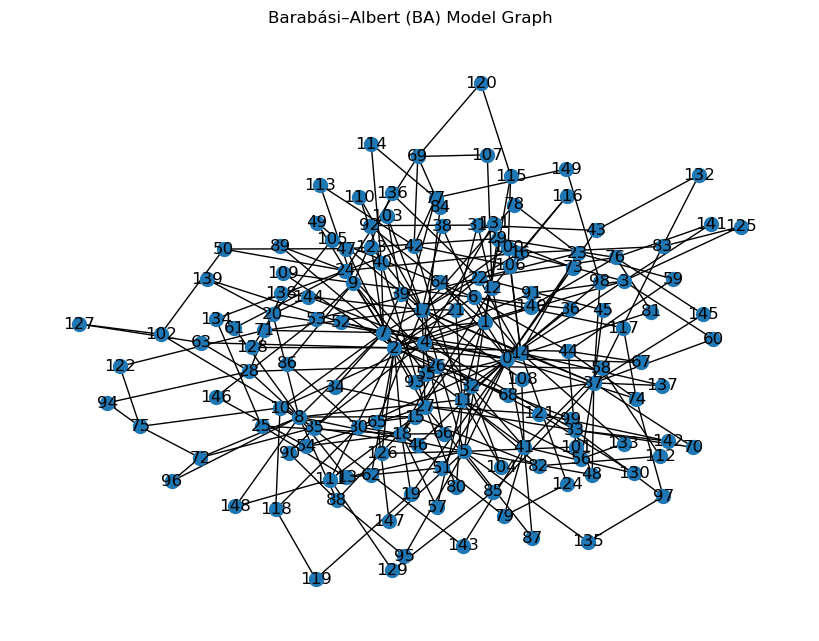

In [97]:
import networkx as nx
import matplotlib.pyplot as plt

# Parameters
n = 150  # total number of nodes
m = 2    # number of edges to attach from a new node to existing nodes

# Generate Barabási–Albert graph
G = nx.barabasi_albert_graph(n, m)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, node_size=100, with_labels=True)
plt.title("Barabási–Albert (BA) Model Graph")
plt.show()

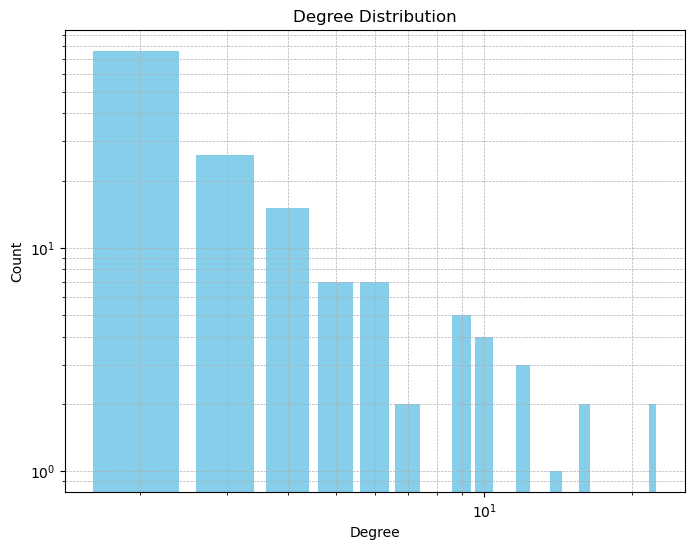

In [98]:
# Plot the degree distribution
degree_sequence = [d for n, d in G.degree()]
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*sorted(degree_count.items()))

plt.figure(figsize=(8, 6))
plt.bar(deg, cnt, width=0.80, color="skyblue")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.yscale("log")
plt.xscale("log")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

## Watts-Strogatz models

**Purpose**: Captures the small-world property — high clustering (like in social networks) and short average path lengths.

**Construction**: Starts with a regular ring lattice and randomly rewires some edges.

**Key Properties**:
1. High clustering (neighbors of a node are likely to be connected)
2. Short path lengths between any two nodes
3. Degree distribution is not power-law (typically more uniform)
4. No hubs: The WS model does not generate hubs or a scale-free structure.

You will notice the 


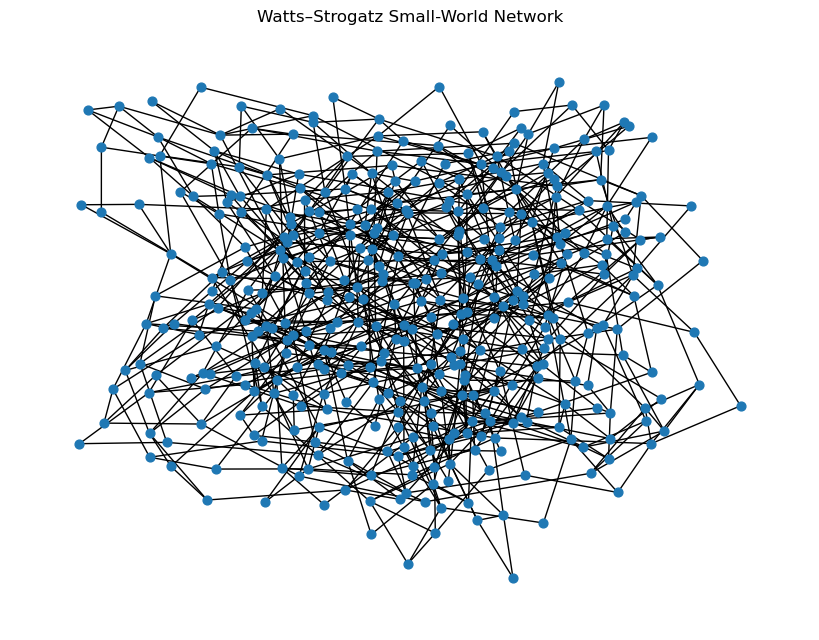

In [130]:
import networkx as nx
import matplotlib.pyplot as plt
import collections

# Parameters
n = 400       # Number of nodes
k = 4       # Each node is connected to k nearest neighbors in ring topology
p = 0.5  # Probability of rewiring each edge

# Generate Watts–Strogatz small-world network
G = nx.watts_strogatz_graph(n, k, p)

# Plot the network
plt.figure(figsize=(8, 6))
nx.draw(G, node_size=40, with_labels=False)
plt.title("Watts–Strogatz Small-World Network")
plt.show()



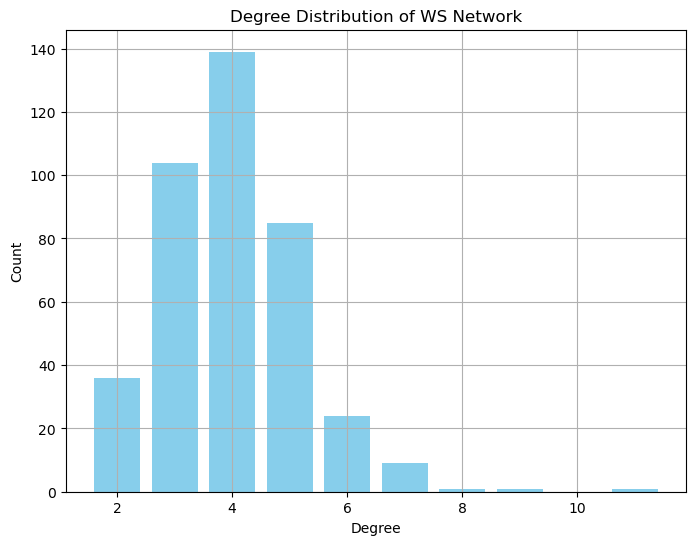

In [131]:
# Degree distribution
degree_sequence = [d for n, d in G.degree()]
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*sorted(degree_count.items()))

plt.figure(figsize=(8, 6))
plt.bar(deg, cnt, width=0.8, color='skyblue')
plt.title("Degree Distribution of WS Network")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.grid(True)
plt.show()